![mobydick](mobydick.jpg)

In this workspace, you'll scrape the novel Moby Dick from the website [Project Gutenberg](https://www.gutenberg.org/) (which contains a large corpus of books) using the Python `requests` package. You'll extract words from this web data using `BeautifulSoup` before analyzing the distribution of words using the Natural Language ToolKit (`nltk`) and `Counter`.

The Data Science pipeline you'll build in this workspace can be used to visualize the word frequency distributions of any novel you can find on Project Gutenberg.

In [1]:
# Import and download packages
import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter
nltk.download('stopwords')

from nltk.corpus import stopwords # for word non relevant

import nltk
from nltk.tokenize import word_tokenize
from collections import Counter # to count the frequency of words

from wordcloud import WordCloud # to create word cloud
import matplotlib.pyplot as plt # to plt freq of words




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Request Moby Dick

-get the contents of Moby Dick from HTML file: https://www.gutenberg.org/files/2701/2701-h/2701-h.htm

https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm

- To fetch the HTML file with Moby Dick we're going to use the request package to make a GET request for the website.

In [2]:
# Getting the Moby Dick HTML
r = requests.get('https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm')

# set the correct text encoding of the HTML page (utf-8)
r.encoding ='utf-8'

#extract the html from the request object
html = r.text

#print the first 2000 characters in html
print(html[0:2000])


<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >

<html xmlns="http://www.w3.org/1999/xhtml" lang="en">
  <head>
    <title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>
    <style type="text/css" xml:space="preserve">

    body { background:#faebd0; color:black; margin-left:15%; margin-right:15%; text-align:justify }
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; m

# Get the text from the HTML

use the package  `BeautifulSoup`

creating the soup, we can use its `.get_text()` method to extract the text.

In [4]:
# create a beautiful soup object from the HTML
html_soup = BeautifulSoup(html, 'html.parser')

# Get the text out of the soup
moby_text = html_soup.get_text()

# print out text at range 25000 25500
print(moby_text[25000:25500])


        observers, that of late years, must have possessed the most abundant and
        the most convenient opportunities of witnessing their habitudes.”
         —Thomas Beale’s History of the Sperm Whale, 1839.
      

        “The Cachalot” (Sperm Whale) “is not only better armed than the True
        Whale” (Greenland or Right Whale) “in possessing a formidable weapon at
        either extremity of its body, but also more frequently displays a
        disposition to employ these wea


# Extract the words

- extract text of interest
- count how many times each word appears, so use `nltk`, Natural Language Toolkit.
- split the text into a list of words

In [5]:
# Create a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+') #Word Tokenization, alphanumeric characters and apostrophes

# Tokenizing the text
tokens = tokenizer.tokenize(moby_text)

# Printing out the first 10 words / tokens
print(tokens[0:10])

['Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville', 'The', 'Project']


# Make the words lowercase

- transform the tokens into lowercase
- removing words not relevant, as puntuation, whitespace, removing English stop words
- saving the results to words_no_stop

In [6]:
# Create a list called words containing all tokens transformed to lowercase
words = [token.lower() for token in tokens]

#print out the first 10 words to check if lower
print(words[0:10])

['moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville', 'the', 'project']


# remove stop words
- non relevant words such as : the, a, an

In [7]:
# Get the English stop words from nltk
stop_words = nltk.corpus.stopwords.words('english')

# print out the first 10 stop words in english
print(stop_words[0:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


# Remove stop words in Moby Dick

create a new list with all words in Moby dick, except the stop words, that are in stop_word

In [8]:
# Create a list words_ns containing all words that are in words but not in stop_words
words_no_stop = [word for word in words if word not in stop_words]

# print first 10 words saved in words with no stop words, words_non_stop_words to check if stop words aren't there
print(words_no_stop[0:10])


['moby', 'dick', 'whale', 'herman', 'melville', 'project', 'gutenberg', 'ebook', 'moby', 'dick']


# Counter object from list of words with no stop words

In [11]:
# Count occurrences of each word
count = Counter(words_no_stop)
# count

# Store 10 most common words and their counts as top_10
top_ten = count.most_common(10)

# Print the top ten most common words
print(top_ten)

[('whale', 1246), ('one', 925), ('like', 647), ('upon', 568), ('man', 527), ('ship', 519), ('ahab', 517), ('ye', 473), ('sea', 455), ('old', 452)]


# Print the word frequency distribution plot


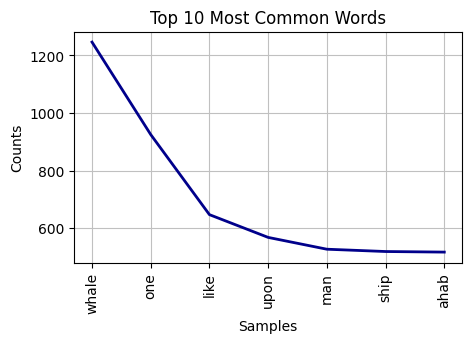

<Axes: title={'center': 'Top 10 Most Common Words'}, xlabel='Samples', ylabel='Counts'>

In [41]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

# This command display figures inline
%matplotlib inline

# Creating the word frequency distribution
freq_dist = nltk.FreqDist(words_no_stop)

# Plotting the word frequency distribution

plt.figure(figsize=(5, 3))
freq_dist.plot(7, title='Top 10 Most Common Words', color='darkblue')





# most commom word in Moby Dick

In [29]:
most_common_word = 'whale'

print(most_common_word)

whale


# Plot bar word frequency of 10 words

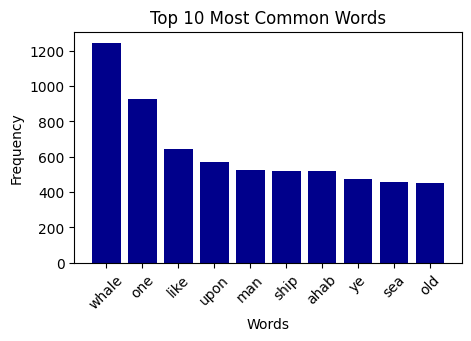

In [43]:
# Extract words and their frequencies for plotting
words, freq = zip(*top_ten)

# Plot the word frequency
plt.figure(figsize=(5, 3))
plt.bar(words, freq, color='darkblue')
plt.title( 'Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Plot word cloud for top 25 words

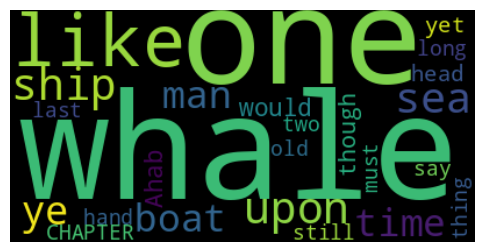

In [38]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords= stop_words, background_color='black', max_words =25).generate(moby_text)

plt.figure(figsize = (6, 4))
plt.clf()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()